## Actividad 4: Dora Novoa

5 ptos Cargar la base de datos kmeans1.csv utilizando pandas.

5 ptos Por medio de matplotlib (o seaborn) genere un gráfico de dispersión (scatter plot) de las variables A y B.


In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



<div style="height: 5px; background: linear-gradient(to right, cyan, lime); margin-bottom: 20px;"></div>

In [2]:
df = pd.read_csv("datos/kmeans.1.csv", delimiter=",")
df

,A,B
0,-3.032505,-3.367918
1,-2.603797,-1.616394
2,-1.357223,-0.199628
3,-2.992206,-3.523316
4,-1.708192,-1.007209
...,...,...
395,11.387093,11.833448
396,10.228298,11.730811
397,11.256921,12.703525
398,11.142780,11.767086


In [3]:
def graficar(x,y, titulo:str=None, farbe:str="red", labelx:str="X", labely:str="Y", verGrid:bool=False):
    plt.plot(x, y, 'o', color=farbe, alpha=0.4)
    if titulo:
        plt.title(titulo)
    plt.grid(verGrid)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.show()

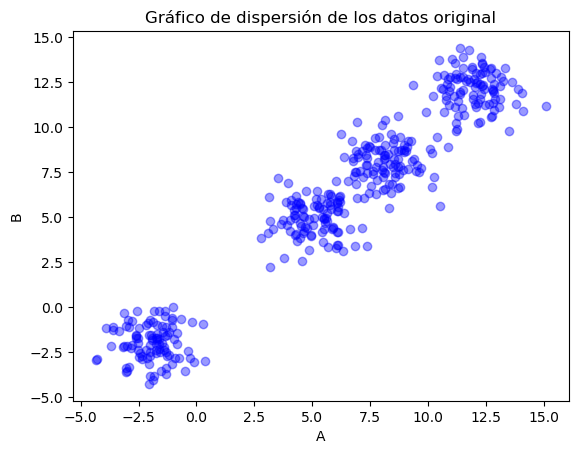

In [4]:
A = df["A"].values
B = df["B"].values
graficar(df["A"], df["B"], titulo="Gráfico de dispersión de los datos original", farbe="blue", labelx="A", labely="B")


**Obs.** Acá se visualiza los datos originales y tienen 4 clusters. 

<div style="height: 5px; background: linear-gradient(to right, cyan, lime); margin-bottom: 20px;"></div>

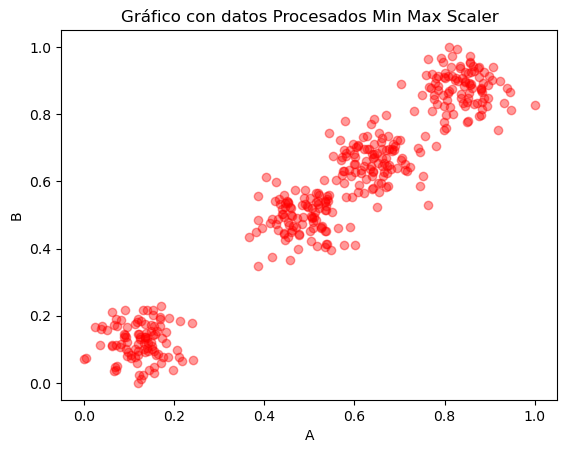

In [5]:
from sklearn.preprocessing import MinMaxScaler
df_scaler = MinMaxScaler().fit_transform(df)
A = df_scaler[:,0]
B = df_scaler[:,1]
graficar(A, B, "Gráfico con datos Procesados Min Max Scaler", "red", "A", "B")


5 ptos Aplique el algoritmo k-means (from sklearn.cluster import KMeans), observe y analice los outputs disponibles (centroides, clusters asignados y distancia dentro de las clases).


In [6]:

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_scaler)
centroides = kmeans.cluster_centers_
etiquetas = kmeans.labels_
inercia = kmeans.inertia_
print("Centroides: \n", centroides)
print("Clusters asignados (etiquetas):\n", etiquetas)
print("Inercia (distancia intra-clase total):", inercia)

Centroides: 
 [[0.48395258 0.49330798]
 [0.12488096 0.1225848 ]
 [0.64504777 0.66137917]
 [0.83902637 0.87789952]]
Clusters asignados (etiquetas):
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Inercia (distancia intra-clase total): 2


5 ptos Ajuste k-means considerando 1,2,...10 clusters, guarde la distancia intra clases en un diccionario. Estudie la documentación de la clase y modifique los argumentos init, n init y max it.


{1: 60.00208300828672, 2: 15.793568251801174, 3: 4.777830629096789, 4: 2.1761149778977487, 5: 1.9664705993115783, 6: 1.7723134463746835, 7: 1.5645892951125773, 8: 1.3677379217886592, 9: 1.2481517021423953, 10: 1.1370613824849158}


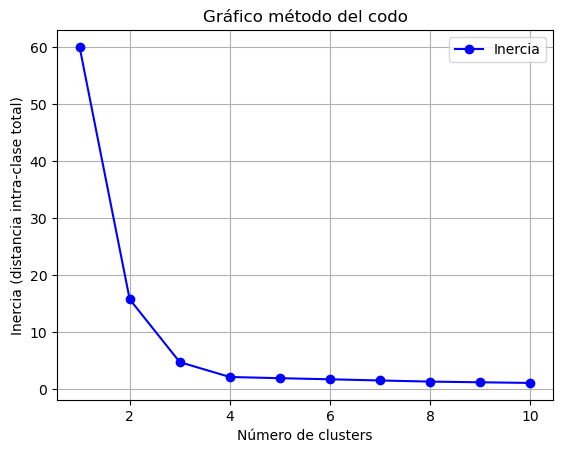

In [7]:

resultado = {}
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000, init="k-means++", n_init=10)
    kmeans.fit(df_scaler)
    resultado[k] = kmeans.inertia_      #distancia intra-clase total   
    
print(resultado)
plt.plot(list(resultado.keys()), list(resultado.values()), 'o-', color="blue")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia (distancia intra-clase total)")
plt.title("Gráfico método del codo")
plt.legend(["Inercia"])
plt.grid(True)


5 ptos Utilizando matplotlib (o seaborn) genere un gráfico que presente la distancia intra clases para cada k utilizado. A través del criterio del codo defina el número de clusters óptimo.

**Respuesta:**

Se puede observar que con 4 cluster se mantiene la inercia, este sería el número de clusters óptimo.

<div style="height: 5px; background: linear-gradient(to right, cyan, lime); margin-bottom: 20px;"></div>

In [8]:
# Función de apoyo
def analisis_rapido_datos(df:pd.DataFrame):
    unicos = {}
    porc_nulos = {}
    
    for col in df.columns.tolist():
        lista_unique = df[col].unique().tolist()
        unicos[col] = lista_unique
        
        nulo = df[col].isnull().sum()
        porc_nulos[col] = round(float(nulo/df.shape[0]), 2)
   
    datos_analisis = {
                     'Columna': list(unicos.keys()),
                     'Valor único': list(unicos.values()),	
                     'Porcentaje nulos': list(porc_nulos.values())
                     }
    df_datos = pd.DataFrame(datos_analisis)
    return df_datos


## 2.2 Análisis de clusters (30 ptos)

5 ptos Aplicar el algoritmo k-means a la base de datos k-means2.csv. Aplique el procesamiento necesario a los datos para una correcta asignación de clusters.

In [9]:
# Análisis rápido de los datos

df2 = pd.read_csv("datos/kmeans2.csv", delimiter=",")
df2_analizado = analisis_rapido_datos(df2)
df2_analizado

,Columna,Valor único,Porcentaje nulos
0,PAC_EDAD,"[79, 35, 25, 34, 45, 75, 21, 36, 44, 61, 31, 1...",0.0
1,SATO2,"[89.0, 96.0, 98.0, 99.0, 91.0, 84.0, 95.0, 78....",0.0
2,TEMPERATURA,"[35.8, 36.4, 35.5, 37.0, 36.8, 36.2, 36.6, 37....",0.0
3,GLASGOW,"[15.0, 14.0, 10.0, 13.0, 12.0, 11.0, 7.0, 8.0,...",0.0
4,EVA,"[3.0, 2.0, 7.0, 5.0, 4.0, 1.0, 6.0, 8.0, 9.0, ...",0.0
5,HGT,"[121.0, 135.0, 85.0, 126.0, 114.0, 136.0, 141....",0.0
6,FR,"[14.0, 16.0, 18.0, 19.0, 15.0, 17.0, 20.0, 22....",0.0
7,DIAS_HOSP,"[21.0, 33.0, 17.0, 1.0, 11.0, 7.0, 94.0, 27.0,...",0.0


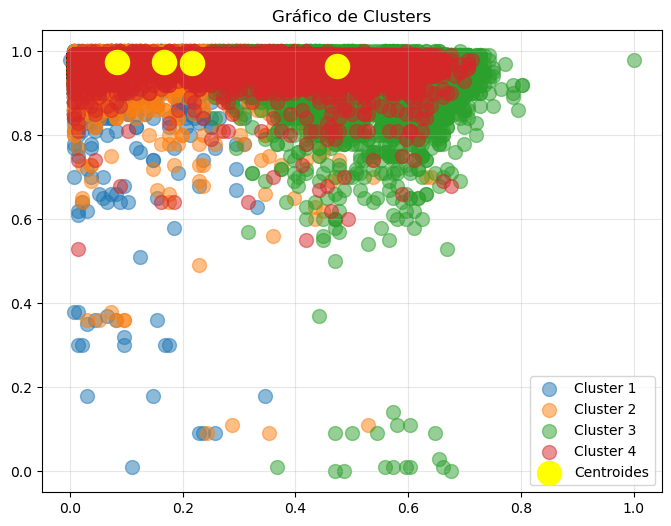

In [10]:
# EScalar los datos
scaler = MinMaxScaler()
df2_scaler = scaler.fit_transform(df2)
nro_clusters = 4 # puedo jugar con este valor
kmeans = KMeans(n_clusters=nro_clusters, random_state=42, max_iter=300, init="k-means++", n_init=10)
# Ajustar el modelo
y_kmeans = kmeans.fit_predict(df2_scaler)
# Graficar los clusters
plt.figure(figsize=(8, 6))
for i in range(nro_clusters):  # Graficar cada cluster
    plt.scatter(
        df2_scaler[y_kmeans == i, 0],
        df2_scaler[y_kmeans == i, 1],
        s=100,
        alpha=0.5,
        label=f'Cluster {i + 1}'
    )
# Graficar los centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow',  label='Centroides')
plt.title("Gráfico de Clusters")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

<div style="height: 5px; background: linear-gradient(to right, cyan, lime); margin-bottom: 20px;"></div>
10 ptos Determine el número de clusters adecuados con alguno de los tres métodos vistos en clases (regla del codo, Davies-Bouldin o Silhouette plot). Genere una función (o un conjunto de funciones) que le permita obtener el reporte de las métricas y visualizaciones.

In [11]:
# Funciones de clusters para el método del codo
def optiomo_cluster_codo(df, max_clusters:int=10):
    resultado = {}
    for k in range (1, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42, max_iter=300, init="k-means++", n_init=10)
        kmeans.fit(df)
        resultado[k] = kmeans.inertia_      #distancia intra-clase total   
    
    return resultado
    
        
def graficar_codo(resultado):
    plt.plot(list(resultado.keys()), list(resultado.values()), 'o-', color="blue")
    plt.xlabel("Número de clusters")
    plt.ylabel("Inercia (distancia intra-clase total)")
    plt.title("Método del codo")
    plt.legend(["Inercia"])
    plt.grid(True)

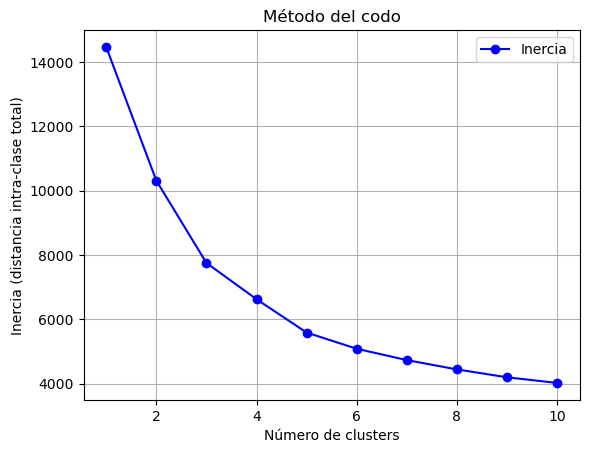

In [12]:
df2 = pd.read_csv("datos/kmeans2.csv", delimiter=",")
# leer y luego escalar los datos con MinMaxScaler
df2_scaler = MinMaxScaler().fit_transform(df2)

resultado = optiomo_cluster_codo(df2_scaler, 10)
graficar_codo(resultado)

**Respuesta:** Con el método del gráfico del codo podría intuir que el mejor respuesta sería 4 clusters. 

Función para Silhouette Analisis según documentación en [sklearn](https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

**mis notas:**  El análisis Silhouette puede ser usado para estudiar la sepración entre el cluster resultante. El gráfico de silueta muestra una medida de la proximidad de cada punto de un grupo a los puntos de los grupos vecinos y, por lo tanto, proporciona una forma de evaluar visualmente parámetros como la cantidad de grupos.(entre -1 y 1) donde el 1 es el mejor resultado.

Para n_clusters = 2, el promedio del índice de silueta es: 0.2889


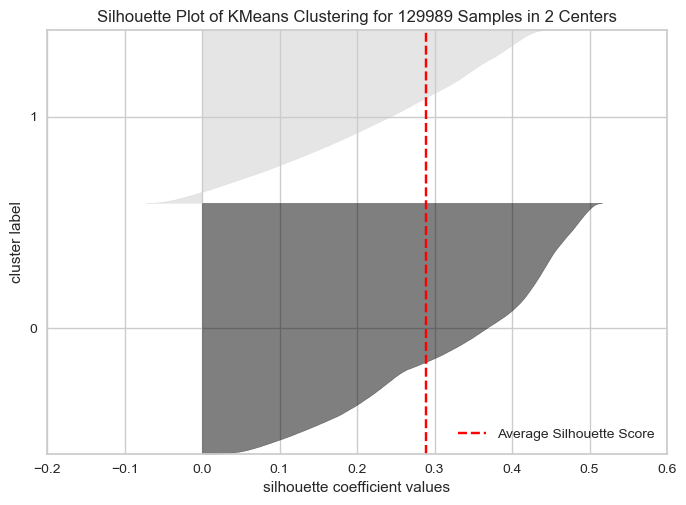

Para n_clusters = 3, el promedio del índice de silueta es: 0.3077


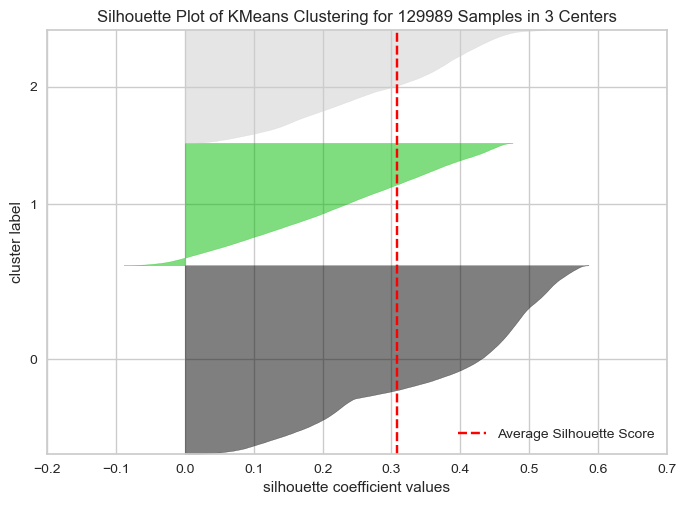

Para n_clusters = 4, el promedio del índice de silueta es: 0.3141


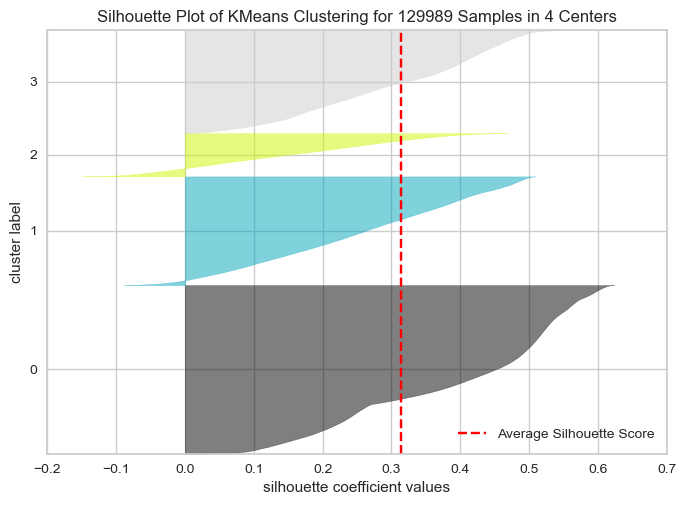

Para n_clusters = 5, el promedio del índice de silueta es: 0.2319


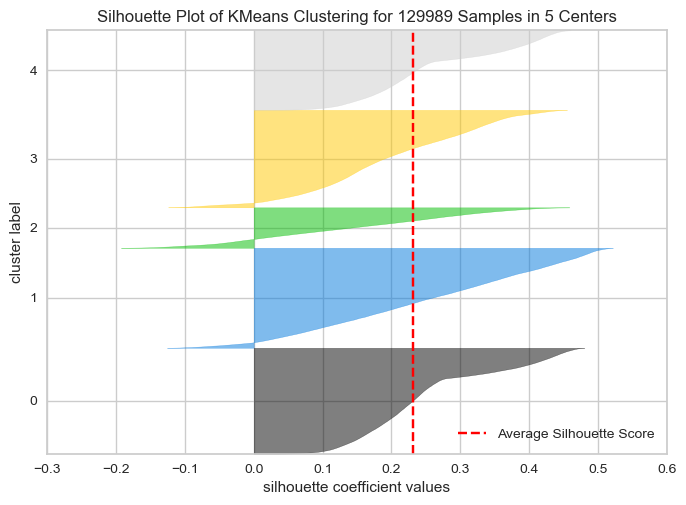

Para n_clusters = 6, el promedio del índice de silueta es: 0.2784


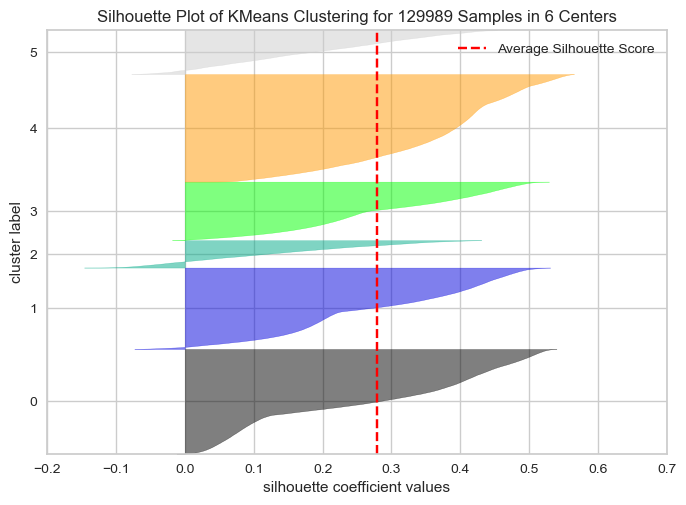

Para n_clusters = 7, el promedio del índice de silueta es: 0.2547


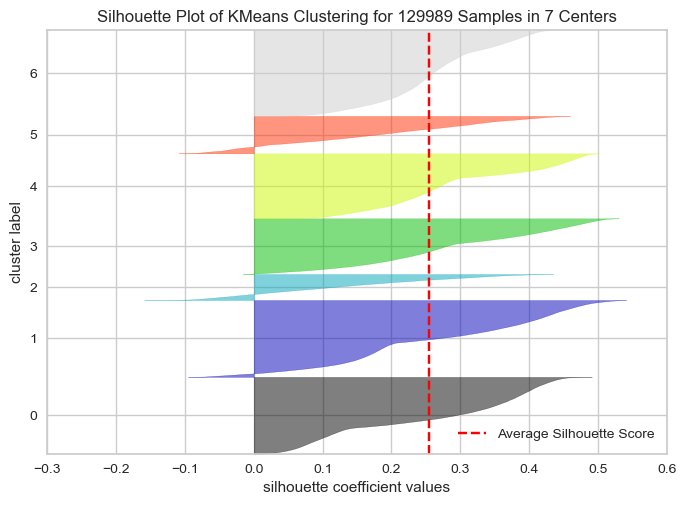

Para n_clusters = 8, el promedio del índice de silueta es: 0.2559


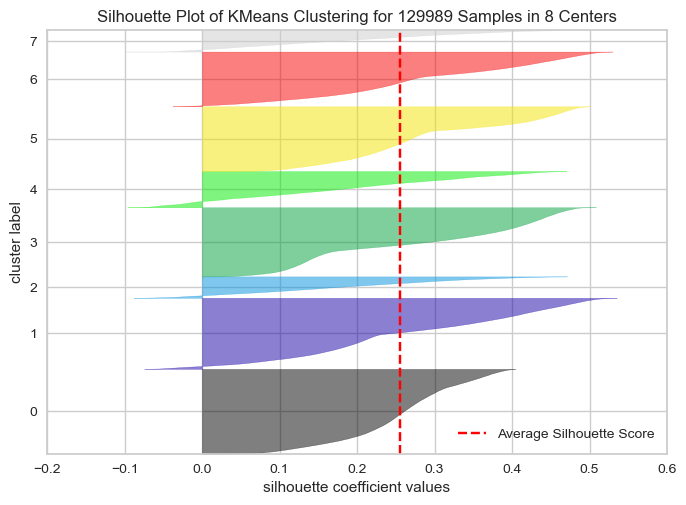

Para n_clusters = 9, el promedio del índice de silueta es: 0.2431


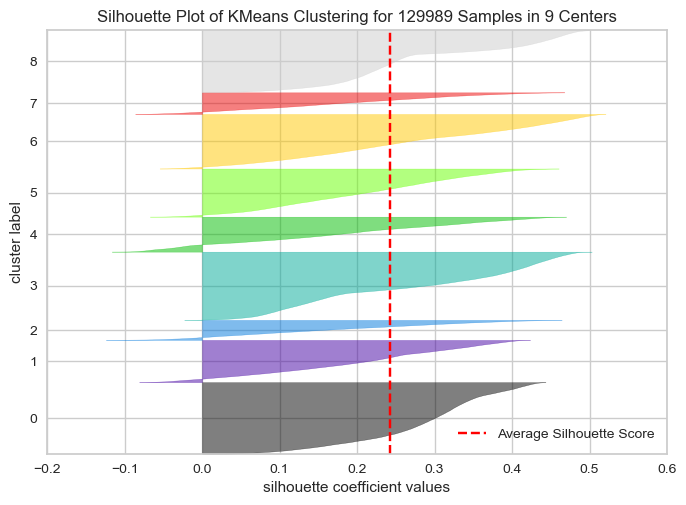

Para n_clusters = 10, el promedio del índice de silueta es: 0.2386


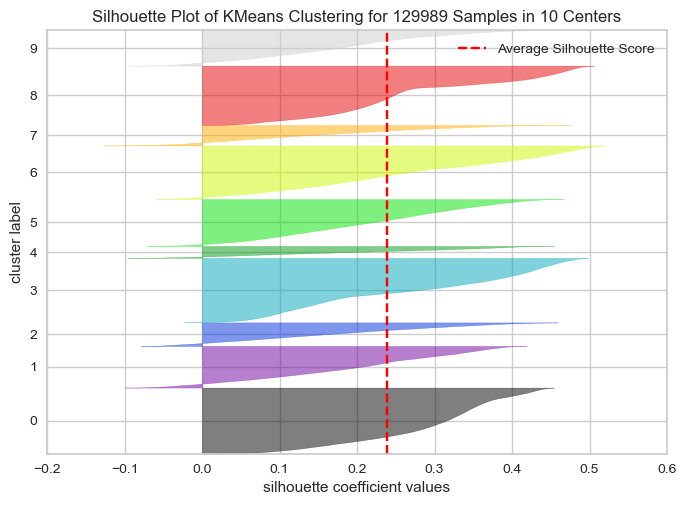


El número óptimo de clusters es: 4, con un índice promedio de silueta de 0.3141


In [ ]:
X = df2_scaler
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

def silhouette_visualizar_analisis(X, max_clusters=10):
    range_n_clusters = range(2, max_clusters + 1)
    best_n_clusters = None
    best_score_silhouette = -1  # Inicializar con un valor muy bajo, pero aquí el mejor valor es cercano a 1 (1 es el mejor)
    
    for n_clusters in range_n_clusters:
        # Crear modelo K-means
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        
        # Ajustar el modelo
        cluster_labels = kmeans.fit_predict(X)
        
        # Calcular el promedio del índice de silueta
        prom_silhouette = silhouette_score(X, cluster_labels)
        print(f"Para n_clusters = {n_clusters}, el promedio del índice de silueta es: {prom_silhouette:.4f}")
        
        # Guardar el mejor número de clusters
        if prom_silhouette > best_score_silhouette:
            best_n_clusters = n_clusters
            best_score_silhouette = prom_silhouette
        
        # Visualizar el Silhouette Plot con Yellowbrick
        visualizer = SilhouetteVisualizer(kmeans, colors='nipy_spectral', random_state=42)
        visualizer.fit(X)
        visualizer.show()
    
    print(f"\nEl número óptimo de clusters es: {best_n_clusters}, con un índice promedio de silueta de {best_score_silhouette:.4f}")

# Visualizar el análisis, lo invoco con el conjunto de datos escalado
silhouette_visualizar_analisis(X, max_clusters=10)

# OJO esto duró mucho tiempo en ejecutarse, fue 67 minutos!!!!

**RESPUESTA:** Con Silhouette Score, puedo determinar que el mejor cluster es 4, con un Silhouette Score de 0.3141 que es el más cercano a 1.

Sin embargo considerar que consume muchisimo tiempo de procesamiento, en este caso fue 67 minutos. 

Para Davies-Bouldin 

In [63]:
from sklearn.metrics import davies_bouldin_score

def indice_davies_bouldin(X, k:int=4):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    db_index = davies_bouldin_score(X, labels)
    return db_index

# Calcular el índice Davies-Bouldin
def calcular_valor_davies_bouldin(df, max_clusters:int=10):
    res_cl_davis = {}
    for k in range(2, max_clusters+1):
        db_index = indice_davies_bouldin(df, k)
        res_cl_davis[k] = db_index
        df_res_cl_davis = pd.DataFrame(list(res_cl_davis.items()), columns=['Número de clusters', 'Índice Davies-Bouldin'])
        valor_min = df_res_cl_davis['Índice Davies-Bouldin'].min()
        nro_clusters = df_res_cl_davis[df_res_cl_davis['Índice Davies-Bouldin'] == valor_min]['Número de clusters'].values[0]
        
    return nro_clusters, valor_min

nro_clusters, valor_min_davis = calcular_valor_davies_bouldin(df2_scaler, 10)
print(f"El número óptimo de clusters es {nro_clusters} con un valor Davies-Bouldin de {valor_min_davis}")


El número óptimo de clusters es 4 con un valor Davies-Bouldin de 1.110835100829728


**Respuesta:** Con Davies-Bouldin puedo determinar que el mejor score será 1.110835, es decir 4 clusters. 

<div style="height: 5px; background: linear-gradient(to right, cyan, lime); margin-bottom: 20px;"></div>

5 ptos Interprete los resultados de los centroides. Implemente una función que le permita analizar los
resultados de los centroides de forma automática. No olvide considerar la transformaciones inversas
del escalamiento o transformación z-score.

In [ ]:
# hice una escala de datos con MinMaxScaler
df2 = pd.read_csv("datos/kmeans2.csv", delimiter=",")
features = df2.columns.tolist()
# leer y luego escalar los datos con MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df2)

kmeans = KMeans(n_clusters=4, random_state=42, max_iter=300, init="k-means++", n_init=10)
kmeans.fit(X_scaled)

def interprete_centroices(kmeans, columnas, scaler):
    centroides_scaled = kmeans.cluster_centers_  # centroides en el espacio de los datos escalados
    centroides_originales = scaler.inverse_transform(centroides_scaled) # centroides en el espacio original, con la transformación inversa del scaler
    centroides_df = pd.DataFrame(centroides_originales, columns=columnas) # Crear un DataFrame con los centroides
    centroides_df.index.name = "Cluster"  # agregar un nombre a la columna de índices
    centroides_df.reset_index(inplace=True) # resetear los índices para que la columna Clusters sea una columna normal al principio jeeje
    centroides_df['Cluster'] = centroides_df['Cluster'] + 1 # Renombrar los clusters
    return centroides_df

df_centroidores_or = interprete_centroices(kmeans, features, scaler)
df_centroidores_or



,Cluster,PAC_EDAD,SATO2,TEMPERATURA,GLASGOW,EVA,HGT,FR,DIAS_HOSP
0,1,11.393477,97.387337,36.846064,14.986888,2.520782,143.751704,18.678649,1.473021
1,2,22.566815,97.428731,36.798320,14.967865,6.076074,153.232517,19.286892,1.775056
2,3,64.461456,96.382937,36.565857,14.908430,3.772013,153.656784,17.591823,1.347984
3,4,29.332735,97.305880,36.724132,14.978680,3.711251,359.310892,18.048923,1.420781


**Mis notas:** Aquí se listan las distancias de los centroides en cada cluster por cada carácteristica. Como son los valores originales, tendríamos que ver cual está mas lejos del centroide pero creo que tendríamos que escalarlos primero, para determinar cual de las características se aleja más de algún centroide. 

In [82]:
# Función de apoyo
def valor_alto_bajo(df:pd.DataFrame):
    resultado = {}
    for col in df.columns:
        max_val = df[col].max()
        min_val = df[col].min()
        resultado[col] = {'max': max_val, 'min': min_val}
    # lo paso a un dataframe para mejor visualización, de forma que se transponga la info para que las columnas sean los valores alto y bajo
    df_resultado = pd.DataFrame(resultado).T
    return df_resultado

centroides_alto_bajo = valor_alto_bajo(df_centroidores_or.iloc[:,1:])  # no tomar en cuenta la primera columna, que era los números de cluster
centroides_alto_bajo

,max,min
PAC_EDAD,64.461456,11.393477
SATO2,97.428731,96.382937
TEMPERATURA,36.846064,36.565857
GLASGOW,14.986888,14.908430
EVA,6.076074,2.520782
HGT,359.310892,143.751704
FR,19.286892,17.591823
DIAS_HOSP,1.775056,1.347984


**Mis notas:**  Aquí muestro el minimo y maximo de distancia de los centroídos por tipo de característica. 
<div style="height: 5px; background: linear-gradient(to right, cyan, lime); margin-bottom: 20px;"></div>



## 2.3 Clase k-means (10 ptos bonus)
5 ptos Implemente una clase para ajustar el algoritmo k-means a una base de datos. Para el preprocesamiento
de la base de datos puede usar clases desarrolladas en actividades anteriores. La clase
debe tener un método fit(df, k) que recibe los datos y entrega el una lista con la etiqueta de cluster
para cada fila en la base de datos original. Dentro de la clase se recomienda incluir los métodos
initialize centroids, assign clusters, update centroids y has converged. Como atributos se deben
considerar la distancia intra clusters y entre clusters, los centroides y la etiqueta asignada a cada
dato.


In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

class KMeans_Ajuste:
    def __init__(self, max_iter=300, init="k-means++", n_init=10, tolerancia=1e-4):
        self.max_iter = max_iter
        self.init = init
        self.n_init = n_init
        self.tolerancia = tolerancia
        self.kmeans = None
        self.centroides = None
        self.etiquetas = None
        self.inercia = None
        self.n_clusters = None
        self.intra_clust_dist = None
        self.inter_clust_dist = None

    def initialize_centroids(self, df, k):
        pass
    
    def indice_davies_bouldin(self, X, k:int=4):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        labels = kmeans.labels_
        db_index = davies_bouldin_score(X, labels)
        return db_index

    # Calcular el índice Davies-Bouldin
    def calcular_valor_davies_bouldin(self, df, max_clusters:int=10):
        res_cl_davis = {}
        for k in range(2, max_clusters+1):
            db_index = self.indice_davies_bouldin(df, k)
            res_cl_davis[k] = db_index
            df_res_cl_davis = pd.DataFrame(list(res_cl_davis.items()), columns=['Número de clusters', 'Índice Davies-Bouldin'])
            valor_min = df_res_cl_davis['Índice Davies-Bouldin'].min()
            nro_clusters = df_res_cl_davis[df_res_cl_davis['Índice Davies-Bouldin'] == valor_min]['Número de clusters'].values[0]
        self.n_clusters = nro_clusters    

    
    def fit(self, df, k, tipo_escala="MinMax"):
        
        if tipo_escala == "MinMax":
            X_scaled = MinMaxScaler().fit_transform(df)
        elif tipo_escala == "Standard":
            X_scaled = StandardScaler().fit_transform(df)
            
        self.kmeans = KMeans(n_clusters=k, random_state=42, max_iter=300, init="k-means++", n_init=10)
        self.kmeans.fit(X_scaled)
        self.centroides = self.kmeans.cluster_centers_
        self.etiquetas = self.kmeans.labels_
        self.inercia = self.kmeans.inertia_
        
        
        

**Respuesta** 

Llegué hasta aquí no más, no me quedó más tiempo. En este bonus, pero la próxima pregunta, si la respondí completa. 


<div style="height: 5px; background: linear-gradient(to right, cyan, lime); margin-bottom: 20px;"></div>
5 ptos Considere que se le ha pedido agrupar a los clientes del año 2024 para definir los principales segmentos
de clientes, luego se desea utilizar los centroides de este modelo para asignar un segmento a los
nuevos clientes que ingresarán a la compañía durante el año 2025. Cómo podemos disponibilizar
este modelo en base al requerimiento?, implemente las funciones que sean necesarias. Recuerde
que en el despligue no se puede entrenar el modelo durante cada nuevo ingreso de clientes.

**Mis Notas y OBS:**

Primero entrenar el modelo con KMean para el 2024, y luego guardar el modelo. Puedo usar esta vez, pickle. 

Luego para el año 2025, debería desplegar el modelo del año pasado, para esto debo cargar el modelo guardado. Se debe implementar una función para asignar a los nuevos clientes al segmento más cercano, para eso utilizaré los centroídes del modelo. 

In [ ]:
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Crear una clase Segmentacion del KMeans
class Segmentacion_KMeans:
    def __init__(self, escala=None):
        self.kmeans = None
        self.escala = escala if escala else StandardScaler() # si no se pasa un tipo de escala, se usará StandardScaler por defecto
        self.centroides = None
        
    def fit(self, X, k):
        X_scaled = self.escala.fit_transform(X)
        self.kmeans = KMeans(n_clusters=k, random_state=42, max_iter=300, init="k-means++", n_init=10)
        self.kmeans.fit(X_scaled)
        self.centroides = self.kmeans.cluster_centers_
    
    #Asigna un segmento a nuevos datos basados en los centroides.
    def prediccion(self, X):
        X_scaled = self.escala.transform(X)
        # tengo que calcular la distincia de cada punto a los centroides y asignar el cluster con la menor distancia... 
        # esto fue un poco más complicado de lo que pensé, pero lo hice sin usar la función predict de KMeans sino con la distancia euclidiana y np.argmin, que es lo que hace internamente KMeans
        distancias = np.linalg.norm(X_scaled[:, None] - self.centroides, axis=2)
        return np.argmin(distancias, axis=1)
        # return self.kmeans.predict(X_scaled)
    
    # Guardar el modelo
    def guardar_modelo(self, ruta:str):
        with open(ruta, "wb") as f:
            pickle.dump(self, f)
    # Cargar el modelo
    def cargar_modelo(ruta:str):
        with open(ruta, "rb") as f:
            return pickle.load(f)

In [87]:
# Crear y entrenar el modelo
modelo = Segmentacion_KMeans()
modelo.fit(df2, 4)
# Guardar el modelo
modelo.guardar_modelo("modelo_segmentacion.pkl")
# Cargar el modelo para usarlo el año 2025
modelo_2025 = Segmentacion_KMeans.cargar_modelo("modelo_segmentacion.pkl")
# predecir un nuevo conjunto de datos
df2_nuevo = df2.sample(100, random_state=42) # necesito simular unos 100 datos nuevos para el año 2025...
labels_2025 = modelo_2025.prediccion(df2_nuevo)
labels_2025

array([1, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 3, 0, 0, 0, 2, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1,
       0, 2, 1, 0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int32)